In [1]:
import ROOT as r

Welcome to JupyROOT 6.14/09


In [2]:
r.RooRandom.randomGenerator().SetSeed(3001)                                                                     
wspace = r.RooWorkspace()                                                                                       
wspace.factory("Gaussian::gauss(x[-10,10],mu[1,-10,10],sigma[1,0.1,10])")                                       
wspace.factory("Exponential::shape(x,l[-0.1,-5,5])")                                                            
wspace.factory("SUM::model(bkgfrac[0.5,0.,1.]*shape,gauss)");                                                   
#wspace.defineSet("poi", "mu")                                                                                  
#wspace.defineSet("obs", "x")                                                                                   
data = wspace.pdf("model").generate(r.RooArgSet(wspace.var("x")), 10000)                                        
getattr(wspace, 'import')(data, r.RooFit.Rename("data"))                                                        
                                                                                                                
x = wspace.var("x")                                                                                             
model = wspace.pdf("model")                                                                                     
gauss = wspace.pdf("gauss")                                                                                     
shape = wspace.pdf("shape")                                                                                     
                                                                                                                
k = r.RooKeysPdf("k", "k", x, data, r.RooKeysPdf.NoMirror, 0.2)                                                 
getattr(wspace, 'import')(k, r.RooFit.RenameAllNodes("workspace"))                                              
                                                                                                                
wspace.Print()                 

[#1] INFO:ObjectHandling -- RooWorkspace::import() importing dataset modelData
[#1] INFO:ObjectHandling -- RooWorkSpace::import() changing name of dataset from  modelData to data
[#1] INFO:ObjectHandling -- RooWorkspace::import() Resolving name conflict in workspace by changing name of imported node  k to k_workspace
[#1] INFO:ObjectHandling -- RooWorkspace::import() importing RooKeysPdf::k_workspace

RooWorkspace()  contents

variables
---------
(bkgfrac,l,mu,sigma,x)

p.d.f.s
-------
RooGaussian::gauss[ x=x mean=mu sigma=sigma ] = 0.606531
RooKeysPdf::k_workspace[ x=x ] = 0.149228
RooAddPdf::model[ bkgfrac * shape + [%] * gauss ] = 0.803265
RooExponential::shape[ x=x c=l ] = 1

datasets
--------
RooDataSet::data(x)



In [9]:
wspace.writeToFile("plots/addPdf_workspace.root")                                                                     
                                                                                                                
                                                                                                                
xframe = x.frame(r.RooFit.Title("Generated data"))                                                              
                                                                                                                
                                                                                                                
                                                                                                                
                                                                                                                
xframe2 = x.frame(r.RooFit.Title("Gaussian+Exp fit to the data"))                                               
                                                                                                                
data.plotOn(xframe)                                                                                             
                                                                                                                
                                                                                                                
result = model.fitTo(data,r.RooFit.Save())                                                                                               
ras_sig = r.RooArgSet(gauss)                                                                                    
ras_bkg = r.RooArgSet(shape)                                                                                    
data.plotOn(xframe2)                                                                                            
model.plotOn(xframe2)    

<ROOT.RooPlot object ("frame_x_6a938b0") at 0x6a938b0>

[#1] INFO:Minization -- createNLL picked up cached consraints from workspace with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (shape,gauss)
 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 bkgfrac      4.86773e-01  6.47972e-03    0.00000e+00  1.00000e+00
     2 l           -1.00558e-01  3.02190e-03   -5.00000e+00  5.00000e+00
     3 mu           9.89659e-01  1.69642e-02   -1.00000e+01  1.00000e+01
     4 sigma        1.00486e+00  1.47765e-02    1.00000e-01  1.00000e+01
 **********
 **   21 **SET ERR         0.5
 **********
 **********
 **   22 **SET PRINT           1
 **********
 **********
 **   23 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 *********

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (shape)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Exercise04
Info in <TCanvas::Print>: png file Exercise04_plot.png has been created


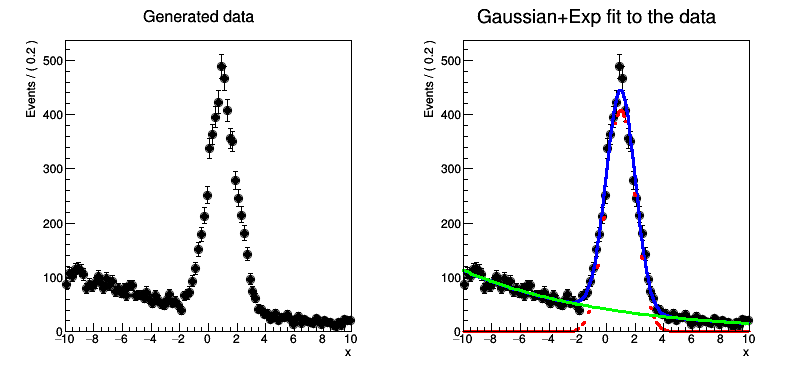

In [10]:
model.plotOn(xframe2,r.RooFit.Components(ras_sig),r.RooFit.LineColor(r.kRed), r.RooFit.LineStyle(r.kDashed))    
model.plotOn(xframe2,r.RooFit.Components(ras_bkg),r.RooFit.LineColor(r.kGreen), r.RooFit.LineStyle(r.kDashed))  
                                                                                                                
c = r.TCanvas("Exercise04","Exercise04",800,400)                                                            
c.Divide(2)                                                                                                     
c.cd(1)                                                                                                         
r.gPad.SetLeftMargin(0.15) ; xframe.GetYaxis().SetTitleOffset(1.6) ; xframe.Draw()                              
                                                                                                                
c.cd(2) ; r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;                
c.Draw()                                                                                                       
c.SaveAs("plots/Exercise04_plot.png")           


  RooFitResult: minimized FCN value: 25530.1, estimated distance to minimum: 1.91999e-08
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
               bkgfrac    4.8677e-01    4.8677e-01 +/-  6.48e-03  <none>
                     l   -1.0056e-01   -1.0056e-01 +/-  3.02e-03  <none>
                    mu    9.8966e-01    9.8966e-01 +/-  1.70e-02  <none>
                 sigma    1.0049e+00    1.0049e+00 +/-  1.48e-02  <none>



Warning in <TROOT::Append>: Replacing existing TH1: correlation_matrix (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file corr_matr.png has been created


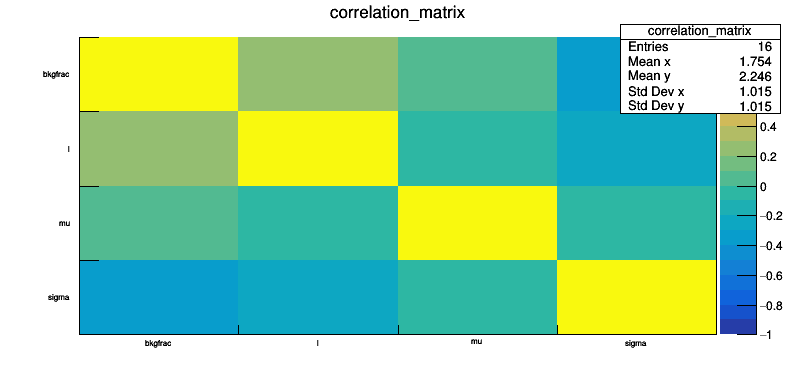

In [12]:
result.Print("v")                                                                                               
hcorr = result.correlationHist()                                                                                
c = r.TCanvas("c","c",800,400)                                                                                  
hcorr.Draw("colz")                                                                                              
c.SaveAs("plots/corr_matr.png")                                                                                       
c.Draw()                              

Info in <TCanvas::Print>: png file cov_sigma-sigfraction.png has been created


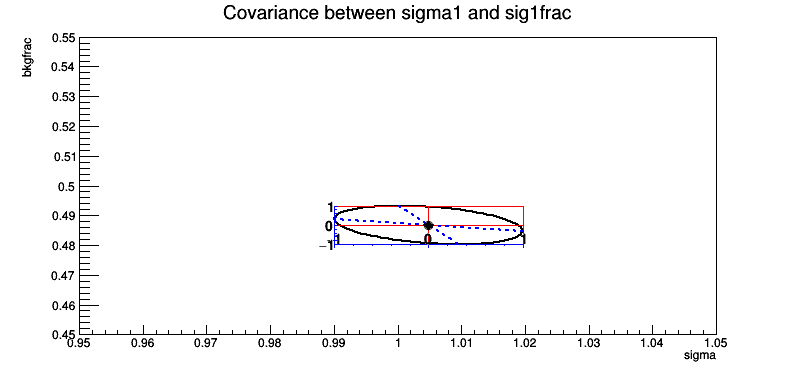

In [14]:
# Visualize ellipse corresponding to single correlation matrix element                                          
sigma = wspace.var("sigma")                                                                                     
bkgfrac = wspace.var("bkgfrac") 
frame = r.RooPlot(sigma, bkgfrac, 0.95, 1.05, 0.45, 0.55)                                                       
frame.SetTitle("Covariance between sigma1 and sig1frac")                                                        
result.plotOn(frame, sigma, bkgfrac, "ME12ABHV")                                                                
c = r.TCanvas("Exercise4","Exercise04",800,400)                                                            
frame.Draw()                                                                                                    
c.SaveAs("plots/cov_sigma-sigfraction.png")                                   
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: nllerrorhandling
Info in <TCanvas::SaveAs>: ROOT file nllerrorhandling_sigma.root has been created


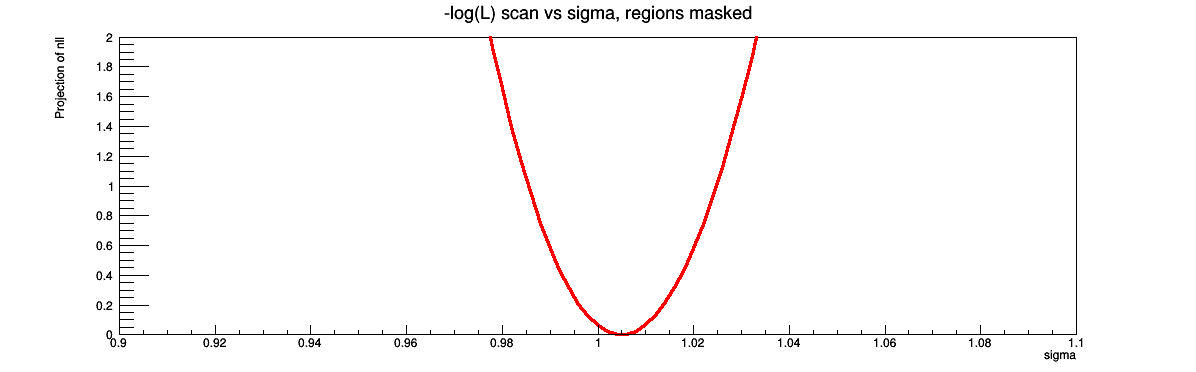

In [19]:
nll = r.RooNLLVar("nll", "nll", model, data)                                                                    
frame2 = sigma.frame(r.RooFit.Range(0.9, 1.1),                                                                  
                  r.RooFit.Title("-log(L) scan vs sigma, regions masked"))                                      
#nll.plotOn(frame2, r.RooFit.PrintEvalErrors(-1), r.RooFit.ShiftToZero(),                                       
#           r.RooFit.EvalErrorValue(nll.getVal() + 10), r.RooFit.LineColor(r.kRed))                             
nll.plotOn(frame2,r.RooFit.ShiftToZero(),r.RooFit.LineColor(r.kRed))                                            
frame2.SetMaximum(2)                                                                                            
frame2.SetMinimum(0)                                                                                            
                                                                                                                
c = r.TCanvas("nllerrorhandling",                                                                               
                 "nllerrorhandling", 1200, 400)                                                                 
frame2.Draw()                                                                                                   
c.SaveAs("plots/nllerrorhandling_sigma.root")
c.Draw()

0.911872228944


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file resid_pull_hist.png has been created


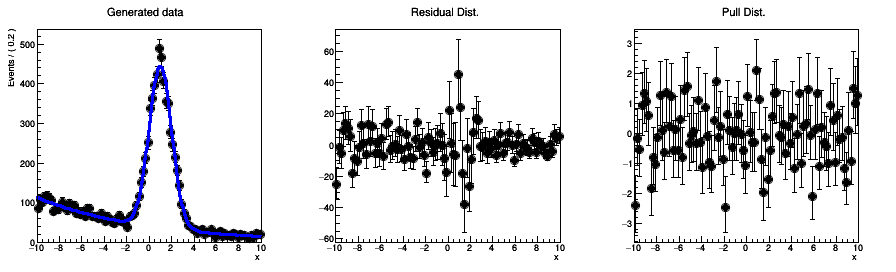

In [21]:
model.plotOn(xframe)
print (xframe.chiSquare())                                                                                     
                                                                                                                
hresidual = xframe.residHist()                                                                                 
hpull = xframe.pullHist()                                                                                      
                                                                                                                
                                                                                                                
frm = x.frame(r.RooFit.Title("Residual Dist."))                                                                 
frm.addPlotable(hresidual, "P")                                                                                 
                                                                                                                
frm_p = x.frame(r.RooFit.Title("Pull Dist."))                                                                   
frm_p.addPlotable(hpull, "P")                 
c = r.TCanvas("c","c",900,300)                                                                                  
                                                                                                                
c.Divide(3)                                                                                                     
c.cd(1); xframe.Draw()                                                                                         
c.cd(2); frm.Draw()                                                                                             
c.cd(3); frm_p.Draw()                                                                                           
c.SaveAs("plots/resid_pull_hist.png")                                                                                 
c.Draw()